In [1]:
import json
import wordcloud
import matplotlib.pyplot as plt

In [2]:
vacancies = json.loads(open('dq_vacancies.json', 'r', encoding='utf8').read())

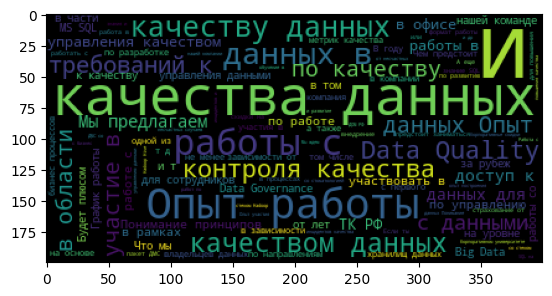

In [3]:
# все слова всех вакансий
text = ' '.join([z for z in ([y['prev_text'] + y['header'] + ' '.join(y['ul']) for x in vacancies for y in x['blocks']]) if z != ''])
wc = wordcloud.WordCloud()
plt.imshow(wc.generate(text))

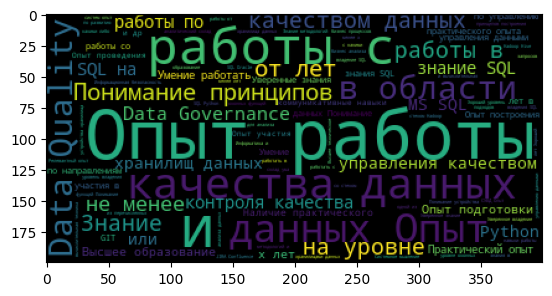

In [4]:
# только требования
text = ' '.join(sum([vacancy.get('requirements', []) for vacancy in vacancies], []))
wc = wordcloud.WordCloud()
plt.imshow(wc.generate(text))

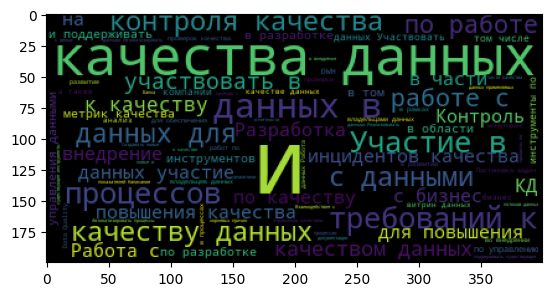

In [5]:
# только обязанности
text = ' '.join(sum([vacancy.get('responsibilities', []) for vacancy in vacancies], []))
wc = wordcloud.WordCloud()
plt.imshow(wc.generate(text))

In [ ]:
# в обязанностях самые подходящие слова
# дальше работаем только с ними

(-0.5, 399.5, 199.5, -0.5)

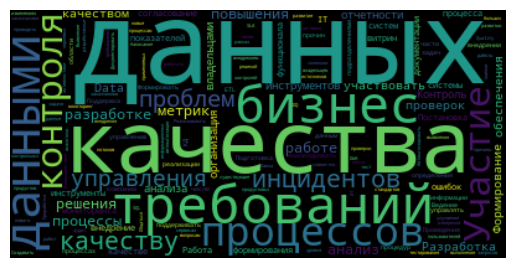

In [6]:
# добавим стопслова и отключим словосочетания
# сделаем картинку посимпатичнее
from nltk.corpus import stopwords
wc = wordcloud.WordCloud(collocations=False, stopwords=stopwords.words("russian"))
plt.imshow(wc.generate(text), interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

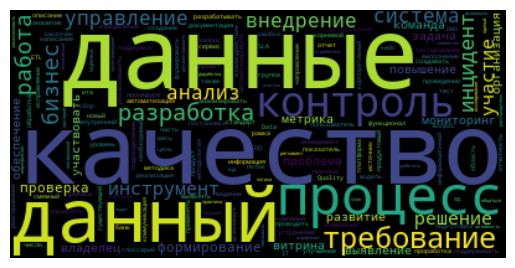

In [7]:
# добавим лемматизацию
from pymystem3 import Mystem
m = Mystem()
text = ''.join(m.lemmatize(text))
plt.imshow(wc.generate(text), interpolation='bilinear')
plt.axis("off")

(-0.5, 3899.5, 2199.5, -0.5)

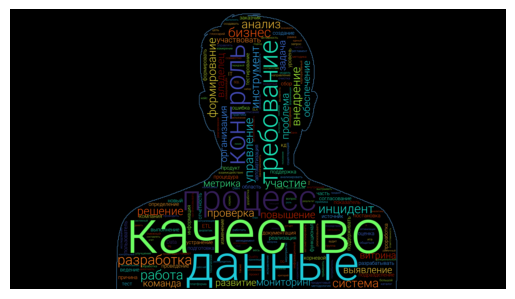

In [8]:
# уберем слово "данный", добавим маску, поменяем шрифт и цветовую схему
from PIL import Image
import numpy as np
wc = wordcloud.WordCloud(
    collocations=False, 
    stopwords=stopwords.words("russian") + ['данный'], 
    mask = np.array(Image.open("mask.png")), 
    font_path='Roboto-Light.ttf', 
    background_color = 'black', 
    contour_width = 2,
    contour_color = 'steelblue', 
    colormap = 'turbo', 
    scale = 5
)
plt.imshow(wc.generate(text), interpolation='bilinear')
plt.axis("off")

In [ ]:
# сгенерируем кучу картинок для КДПВ хабра размером 780x440 и выберем из них что-нибудь посимпатичнее
for i in range(1000):
    plt.figure(figsize=(20,10), facecolor='k')
    plt.axis("off")
    plt.imshow(wc.generate(text), interpolation='bilinear')
    plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')
    plt.close()
    image = Image.open('wordcloud.png')
    new_image = image.resize((780, 440))
    new_image.save(f'wordclouds/{i}.png')